## k-Means法
アルゴリズム
1. 各クラスタに割り当てられた点について重心を計算する
2. 各点について、上記で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当て直す。

In [1]:
import numpy as np
import itertools

In [4]:
class KMeans:
    def __init__(self, n_clusters, max_iter=1000, random_seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_seed)
        
    def fit(self, X):
        cycle = itertools.cycle(range(self.n_clusters))
        self.labels_ = np.fromiter(
                itertools.islice(cycle, X.shape[0]), dtype=np.int)
        
        self.random_state.shuffle(self.labels_)
        labels_prev = np.zeros(X.shape[0])
        count = 0
        self.cluster_centers_ = np.zeros(
                (self.n_clusters, X.shape[1]))
        while (not (self.labels_ == labels_prev).all()
                  and count < self.max_iter):
            for i in range(self.n_clusters):
                # クラスタ中心の計算
                XX = X[self.labels_ == i, :]
                self.cluster_centers_[i, :] = XX.mean(axis=0)
            #距離の計算
            dist = ((X[:, :, np.newaxis]
                            - self.cluster_centers_.T[np.newaxis, :, :])**2).sum(axis=1)
            labels_prev = self.labels_
            self.labels_ = dist.argmin(axis=1)
            count += 1
            
    def predict(self, X):
        dist = ((X[:, :, np.newaxis]
                            - self.cluster_centers_.T[np.newaxis, :, :])**2).sum(axis=1)
        labels = dist.argmin(axis=1)
        return labels

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

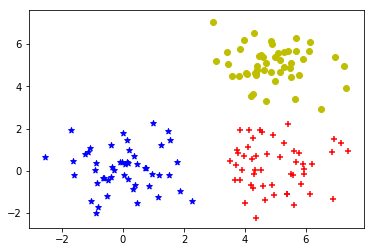

In [6]:
np.random.seed(0)
points1 = np.random.randn(50, 2)
points2 = np.random.randn(50, 2) + np.array([5, 0])
points3 = np.random.randn(50, 2) + np.array([5, 5])

points = np.r_[points1, points2, points3]
np.random.shuffle(points)

model = KMeans(3)
model.fit(points)

markers = ["+", "*", "o"]
colors = ["r", "b", "y"]
for i in range(3):
    p = points[model.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1], color=colors[i], marker=markers[i])